In [2]:
import os
import cv2
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

### Data preprocessing

OBS! in jazz folder there are only 99 spectrograms, jazz00054.png missing and jazz.00054.wav is corrupted

Steps to save image in the same format:

- save the plot with matplotlib, then reshape with cv2

- or, make figsize in plot (4.32, 2.88)

(288, 432, 3)

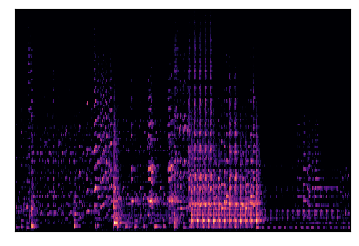

In [20]:
import librosa
import librosa.display

# Compute spectrogram for the 54th jazz audio
audio_path = './Data/genres_original/jazz/jazz.00054.wav'
mel_path = './Data/images_original/jazz/jazz00054.png'

y, sr = librosa.load(audio_path)
s = librosa.feature.melspectrogram(y=y, sr=sr)
s_db = librosa.amplitude_to_db(s, ref=np.max)

plt.figure(figsize=(4.32, 2.88))
img = librosa.display.specshow(s_db, sr=sr)
plt.savefig(mel_path) 

# Check shape (288, 432, 3)
image = cv2.imread(mel_path)
image.shape

+ images (spectrograms) have the same shape (288, 432, 3)

In [3]:
genres = list(os.listdir('./Data/images_new/'))
images = []
labels = []
for genre in genres:
    genre_path = f'./Data/images_new/{genre}/'
    genre_images = list(os.listdir(genre_path))
    print(len(genre_images))
    for image_path in genre_images:
        image = cv2.imread(os.path.join(genre_path, image_path))
        print(image.shape)
        images.append(image)
        labels.append(genre)
# print(labels)

100
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(2

+ scale images to [0,1] for computational efficiency

In [4]:
scaler = MinMaxScaler()
images = np.array(images)
shape = images.shape

# Flatten images for scaling
images = images.reshape(-1, shape[1] * shape[2] * shape[3])

images = scaler.fit_transform(images)

# Reshape to original form
images = images.reshape(-1, shape[1], shape[2], shape[3])

images = list(images)

+ encode labels as numerical values for easier computation

In [5]:
encoder = LabelEncoder()
one_hot_labels = encoder.fit_transform(np.array(labels).reshape(-1, 1))
one_hot_labels

C:\Users\prico\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

+ new dataset contains same-sized RGB images and numerical encoded labels

In [6]:
dataset = pd.DataFrame({'image': images, 'label': one_hot_labels})
dataset

,image,label
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
3,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
4,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
...,...,...
995,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
996,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
997,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
998,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9


+ split into train/test but only AFTER scaling (scaling parameters must be based on the statistics of the entire dataset, otherwise it may contain biases for train/test and result in lower performance)

+ use `stratify` parameter in order to ensure that the distribution of classes is preserved in both the training and test sets (original labels here, not the numerical encoded)

In [7]:
X = dataset.image.values
y = dataset.label.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=labels, test_size=0.2)
y_train

array([5, 2, 9, 5, 5, 4, 2, 7, 8, 9, 2, 7, 9, 6, 7, 9, 7, 7, 0, 1, 0, 8,
       6, 4, 9, 0, 4, 3, 9, 4, 8, 6, 0, 0, 6, 1, 0, 3, 9, 4, 5, 7, 9, 1,
       4, 5, 5, 8, 1, 3, 8, 8, 7, 2, 0, 2, 4, 3, 5, 2, 4, 0, 4, 2, 6, 2,
       8, 5, 5, 1, 3, 1, 5, 7, 2, 7, 7, 8, 6, 2, 8, 4, 5, 4, 3, 5, 2, 6,
       4, 7, 5, 6, 4, 5, 6, 9, 5, 8, 3, 3, 6, 3, 6, 2, 6, 1, 7, 1, 5, 3,
       4, 3, 2, 9, 1, 6, 7, 4, 9, 3, 0, 9, 4, 8, 9, 4, 8, 9, 1, 5, 7, 4,
       9, 8, 2, 0, 9, 0, 7, 3, 8, 8, 4, 0, 6, 5, 6, 0, 3, 1, 6, 6, 5, 8,
       6, 7, 1, 6, 9, 2, 8, 4, 2, 5, 3, 4, 5, 5, 2, 2, 2, 7, 8, 0, 1, 8,
       3, 1, 6, 6, 7, 8, 0, 5, 2, 9, 2, 6, 1, 7, 2, 4, 3, 6, 4, 9, 0, 4,
       0, 0, 9, 4, 0, 4, 2, 0, 2, 6, 7, 2, 4, 6, 5, 5, 6, 4, 0, 3, 7, 7,
       5, 2, 0, 2, 0, 4, 5, 7, 4, 4, 3, 3, 3, 1, 3, 8, 0, 0, 3, 6, 8, 5,
       4, 2, 1, 2, 1, 7, 2, 7, 0, 4, 0, 2, 0, 3, 9, 1, 6, 7, 4, 3, 6, 3,
       7, 0, 2, 6, 2, 9, 7, 6, 3, 0, 1, 5, 4, 0, 1, 7, 3, 5, 0, 8, 9, 4,
       2, 5, 4, 1, 1, 3, 7, 0, 8, 7, 4, 5, 1, 4, 6,

### Build CNN

In [8]:
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import utils
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

+ encode labels as hot-one vectors to be fed into the neural network

+ convert from ndarray to tensors which are well-suited for numerical computations

In [9]:
X_train_tensor = tf.convert_to_tensor(X_train.tolist())
X_test_tensor = tf.convert_to_tensor(X_test.tolist())
y_train_tensor = tf.convert_to_tensor(to_categorical(y_train, len(genres)))
y_test_tensor = tf.convert_to_tensor(to_categorical(y_test, len(genres)))
X_train_tensor

<tf.Tensor: shape=(800, 256, 256, 3), dtype=float64, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],




In [10]:
model = Sequential(name='cnn')

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    padding='same',
                    activation='relu',
                    input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    padding='same',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    padding='same',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model.fit(X_train_tensor,
                    y_train_tensor,
                    batch_size=16,
                    validation_data=(X_test_tensor, y_test_tensor),
                    epochs=100)

Epoch 1/100
50/50 [==============================] - 31s 541ms/step - loss: 2.3243 - accuracy: 0.1513 - val_loss: 2.1189 - val_accuracy: 0.2800
Epoch 2/100
50/50 [==============================] - 25s 499ms/step - loss: 1.8733 - accuracy: 0.3350 - val_loss: 1.6479 - val_accuracy: 0.4400
Epoch 3/100
50/50 [==============================] - 25s 508ms/step - loss: 1.5272 - accuracy: 0.4688 - val_loss: 1.3677 - val_accuracy: 0.5250
Epoch 4/100
50/50 [==============================] - 26s 516ms/step - loss: 1.2831 - accuracy: 0.5550 - val_loss: 1.2671 - val_accuracy: 0.5700
Epoch 5/100
50/50 [==============================] - 26s 512ms/step - loss: 0.9621 - accuracy: 0.6600 - val_loss: 1.2335 - val_accuracy: 0.5850
Epoch 6/100
50/50 [==============================] - 26s 522ms/step - loss: 0.6609 - accuracy: 0.7850 - val_loss: 1.1545 - val_accuracy: 0.6200
Epoch 7/100
50/50 [==============================] - 26s 512ms/step - loss: 0.4942 - accuracy: 0.8438 - val_loss: 1.2640 - val_accuracy:

In [71]:
model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 288, 432, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 144, 108, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 144, 108, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 72, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 54, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 27, 64)       0       

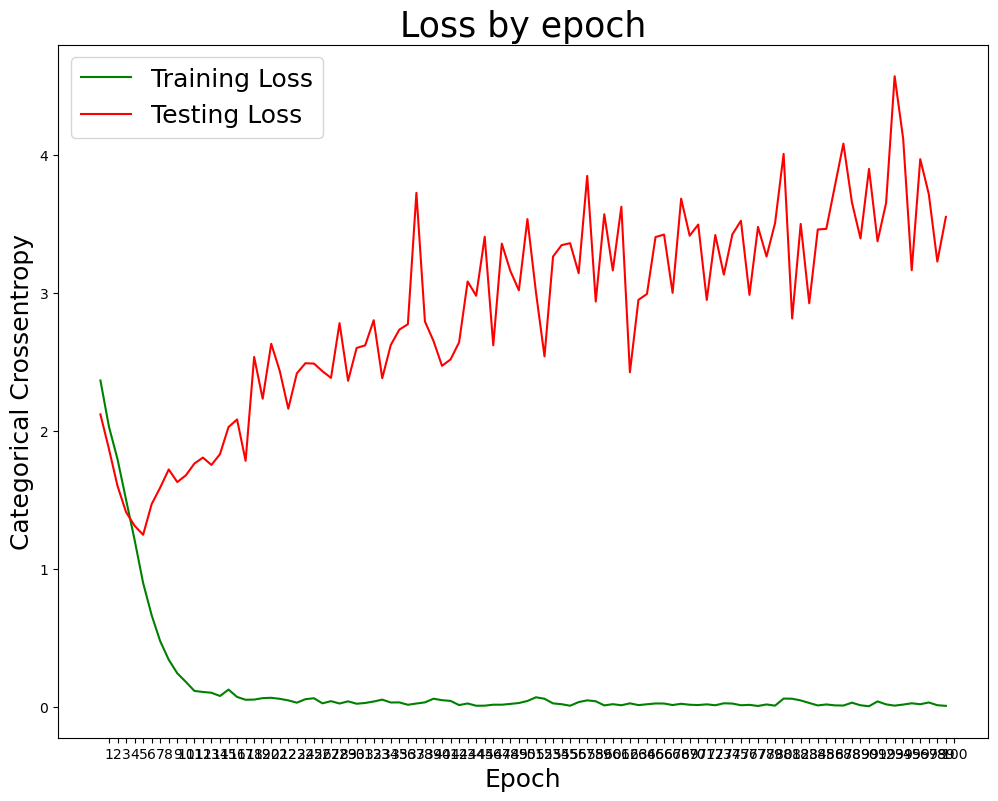

In [90]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 9))

plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(test_loss, label='Testing Loss', color='red')

plt.title('Loss by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(1, 101), range(1, 101))

plt.legend(fontsize=18)

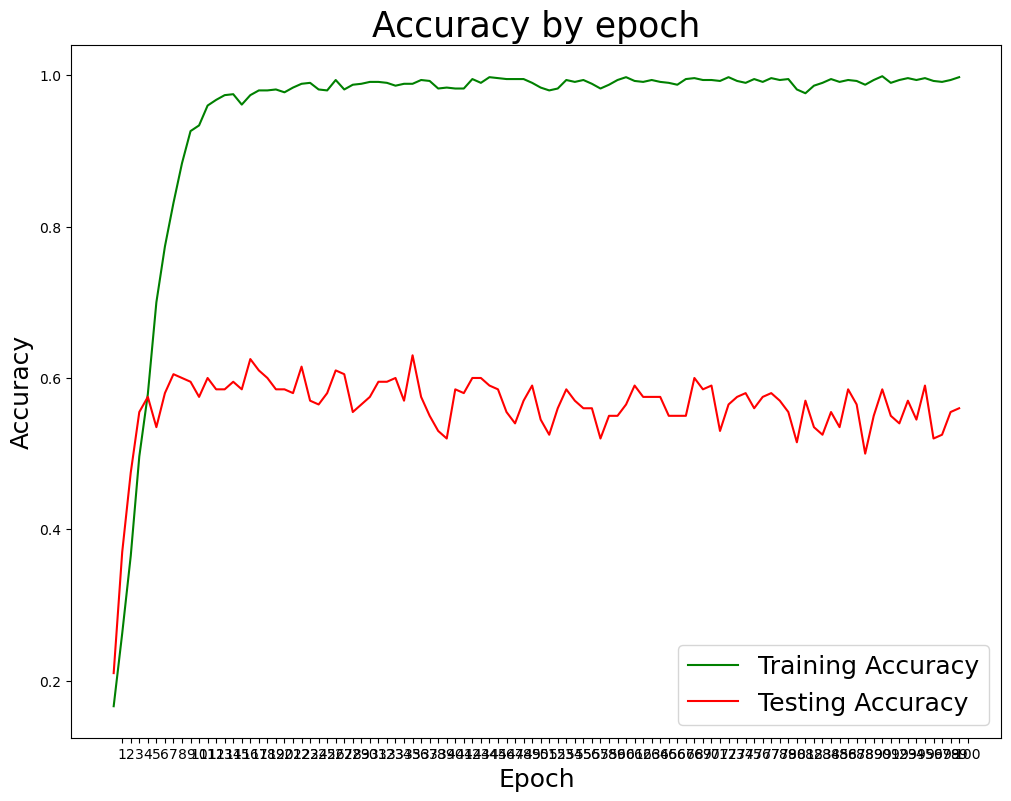

In [91]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 9))

plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Testing Accuracy', color='red')

plt.title('Accuracy by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(range(1, 101), range(1, 101))

plt.legend(fontsize=18)

Make predictions for additional metrics

In [78]:
y_pred = model.predict(X_test_tensor)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(y_test_tensor, axis=1)

7/7 [==============================] - 2s 308ms/step


+ confusion matrix (+ what it is and details)

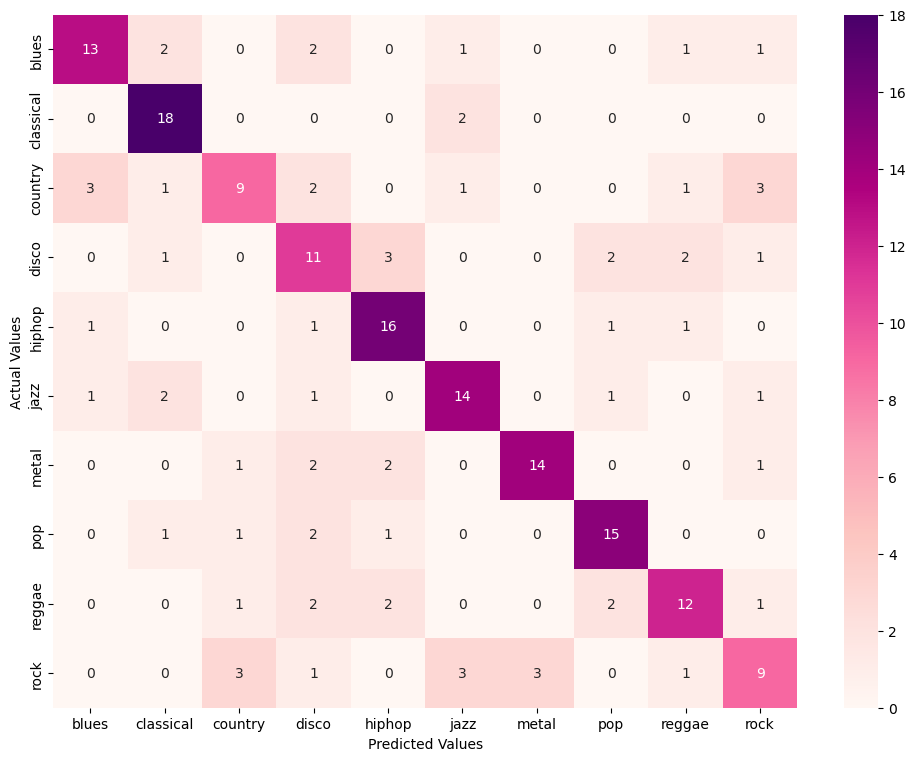

In [84]:
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./Images/CNN_confusion_matrix.png', bbox_inches='tight')

+ score metrics (+ more details on this)

In [87]:
print(classification_report(y_actual, y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.72      0.65      0.68        20
   classical       0.72      0.90      0.80        20
     country       0.60      0.45      0.51        20
       disco       0.46      0.55      0.50        20
      hiphop       0.67      0.80      0.73        20
        jazz       0.67      0.70      0.68        20
       metal       0.82      0.70      0.76        20
         pop       0.71      0.75      0.73        20
      reggae       0.67      0.60      0.63        20
        rock       0.53      0.45      0.49        20

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



Save the model for reusability

In [88]:
model.save_weights('./Models/GTZAN_CNN.cpkt')

pickle.dump(history.history, open('./Models/GTZAN_CNN_history.pkl', 'wb'))

### Transfer learning-based model 

Since there is only a small pool of data (~1k images), we should adopt
the CNN models pre-trained on ImageNet (millions of images), and then continue training the model on our dataset of images. 

Through pre-training on ImageNet, the Convolutional Layers weights in the CNN models have been so fine-tuned to capture different types of edge patterns that they can be easily reused to infer on other kinds of images. 

The Fully-Connected Layers in the original CNN model is chopped off, and replaced with customized Fully-Connected Layers for the new data set. During training, only weights in the Fully-Connected Layers are fine-tuned. This solution is typically useful for extremely small data sets (~100 to ~1k).

In [106]:
import tensorflow_hub as hub

# Pre-trained ResNet50 model
resnet_module = hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5', trainable=False)

inputs = tf.keras.layers.Input(shape=(288, 432, 3))
x = resnet_module(inputs)
outputs = tf.keras.layers.Dense(len(genres), activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_tensor,
                    y_train_tensor,
                    batch_size=16,
                    validation_data=(X_test_tensor, y_test_tensor),
                    epochs=30)

Epoch 1/30
50/50 [==============================] - 108s 2s/step - loss: 1.9897 - accuracy: 0.3113 - val_loss: 1.4924 - val_accuracy: 0.5350
Epoch 2/30
50/50 [==============================] - 107s 2s/step - loss: 1.3827 - accuracy: 0.5688 - val_loss: 1.3269 - val_accuracy: 0.5750
Epoch 3/30
50/50 [==============================] - 108s 2s/step - loss: 1.1956 - accuracy: 0.6187 - val_loss: 1.2347 - val_accuracy: 0.5900
Epoch 4/30
50/50 [==============================] - 112s 2s/step - loss: 1.0922 - accuracy: 0.6425 - val_loss: 1.1860 - val_accuracy: 0.6150
Epoch 5/30
50/50 [==============================] - 116s 2s/step - loss: 0.9896 - accuracy: 0.6762 - val_loss: 1.1230 - val_accuracy: 0.6150
Epoch 6/30
50/50 [==============================] - 118s 2s/step - loss: 0.9122 - accuracy: 0.7150 - val_loss: 1.0975 - val_accuracy: 0.6300
Epoch 7/30
50/50 [==============================] - 121s 2s/step - loss: 0.8585 - accuracy: 0.7325 - val_loss: 1.0762 - val_accuracy: 0.6300
Epoch 8/30
50

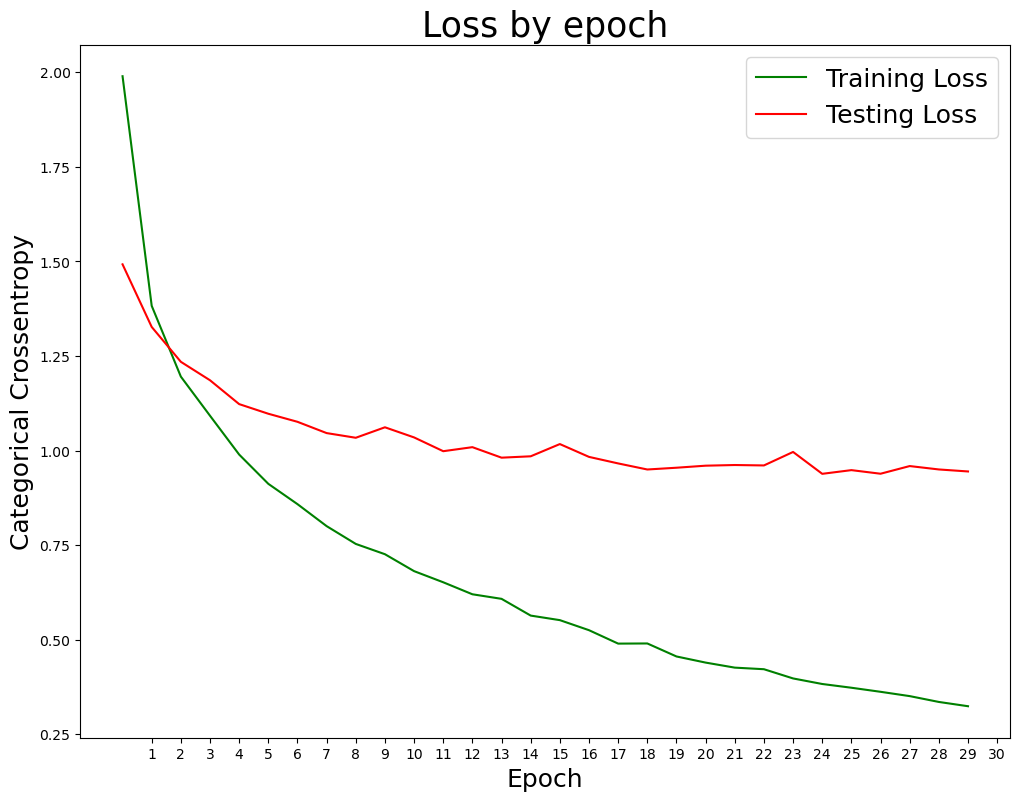

In [107]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 9))

plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(test_loss, label='Testing Loss', color='red')

plt.title('Loss by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(1, 31), range(1, 31))

plt.legend(fontsize=18)

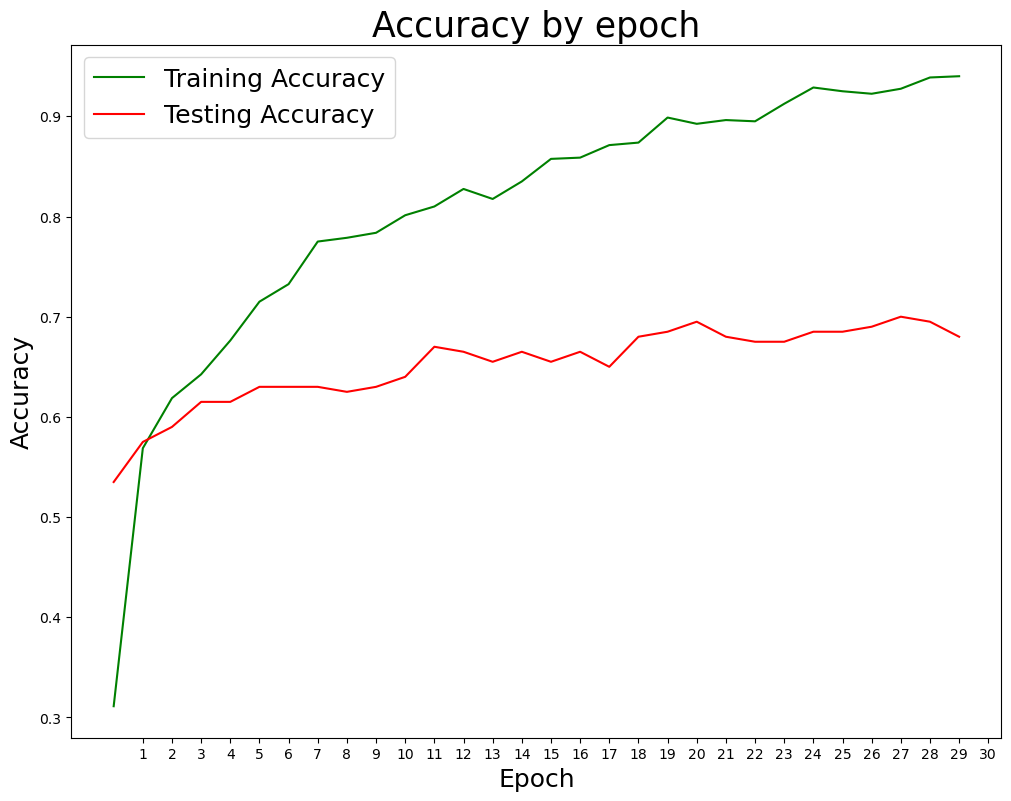

In [108]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 9))

plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Testing Accuracy', color='red')

plt.title('Accuracy by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(range(1, 31), range(1, 31))

plt.legend(fontsize=18)

In [109]:
y_pred = model.predict(X_test_tensor)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(y_test_tensor, axis=1)

7/7 [==============================] - 31s 4s/step


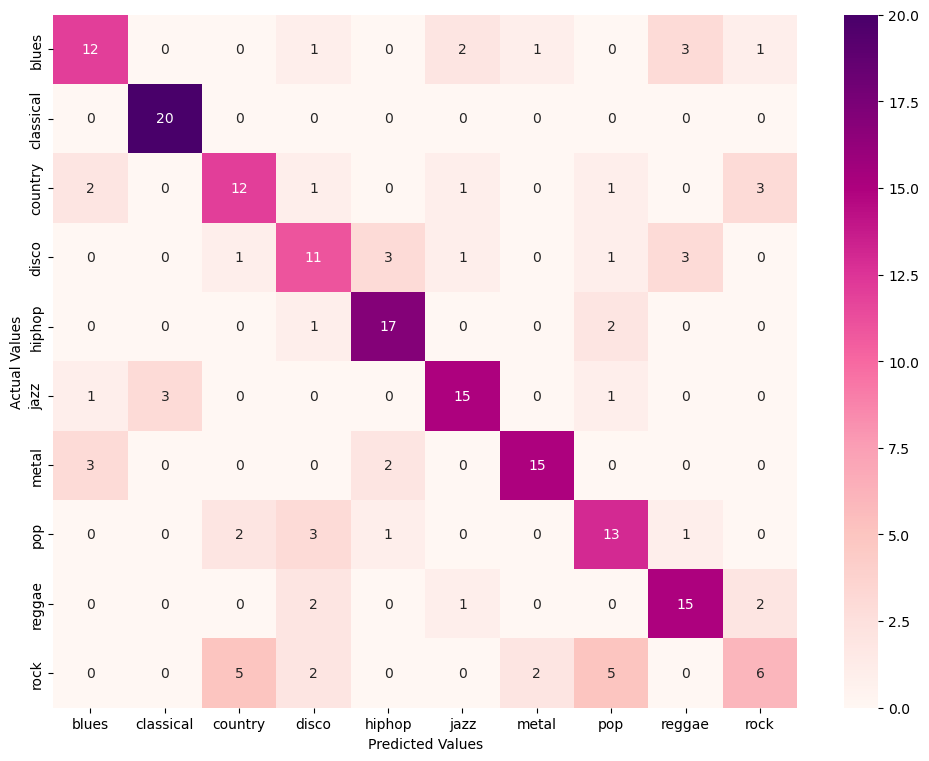

In [110]:
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./Images/Transfer_resnet_confusion_matrix.png', bbox_inches='tight')

In [111]:
print(classification_report(y_actual, y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.67      0.60      0.63        20
   classical       0.87      1.00      0.93        20
     country       0.60      0.60      0.60        20
       disco       0.52      0.55      0.54        20
      hiphop       0.74      0.85      0.79        20
        jazz       0.75      0.75      0.75        20
       metal       0.83      0.75      0.79        20
         pop       0.57      0.65      0.60        20
      reggae       0.68      0.75      0.71        20
        rock       0.50      0.30      0.37        20

    accuracy                           0.68       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.67      0.68      0.67       200



In [112]:
model.save_weights('./Models/GTZAN_transfer_resnet.cpkt')

pickle.dump(history.history, open('./Models/GTZAN_CNN__transfer_resnet_history.pkl', 'wb'))

In [99]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(288, 432, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dropout(0.2),
                    Dense(len(genres), activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_tensor,
                    y_train_tensor,
                    batch_size=16,
                    validation_data=(X_test_tensor, y_test_tensor),
                    epochs=100)

Epoch 1/100
50/50 [==============================] - 48s 863ms/step - loss: 2.1042 - accuracy: 0.2387 - val_loss: 1.6385 - val_accuracy: 0.4900
Epoch 2/100
50/50 [==============================] - 65s 1s/step - loss: 1.6008 - accuracy: 0.4750 - val_loss: 1.4176 - val_accuracy: 0.5400
Epoch 3/100
50/50 [==============================] - 90s 2s/step - loss: 1.3881 - accuracy: 0.5500 - val_loss: 1.2706 - val_accuracy: 0.6300
Epoch 4/100
50/50 [==============================] - 89s 2s/step - loss: 1.2796 - accuracy: 0.5675 - val_loss: 1.2045 - val_accuracy: 0.6150
Epoch 5/100
50/50 [==============================] - 52s 1s/step - loss: 1.1696 - accuracy: 0.6225 - val_loss: 1.1312 - val_accuracy: 0.6650
Epoch 6/100
50/50 [==============================] - 38s 773ms/step - loss: 1.0805 - accuracy: 0.6662 - val_loss: 1.1082 - val_accuracy: 0.6450
Epoch 7/100
50/50 [==============================] - 39s 774ms/step - loss: 1.0627 - accuracy: 0.6475 - val_loss: 1.0618 - val_accuracy: 0.6600
Epoc

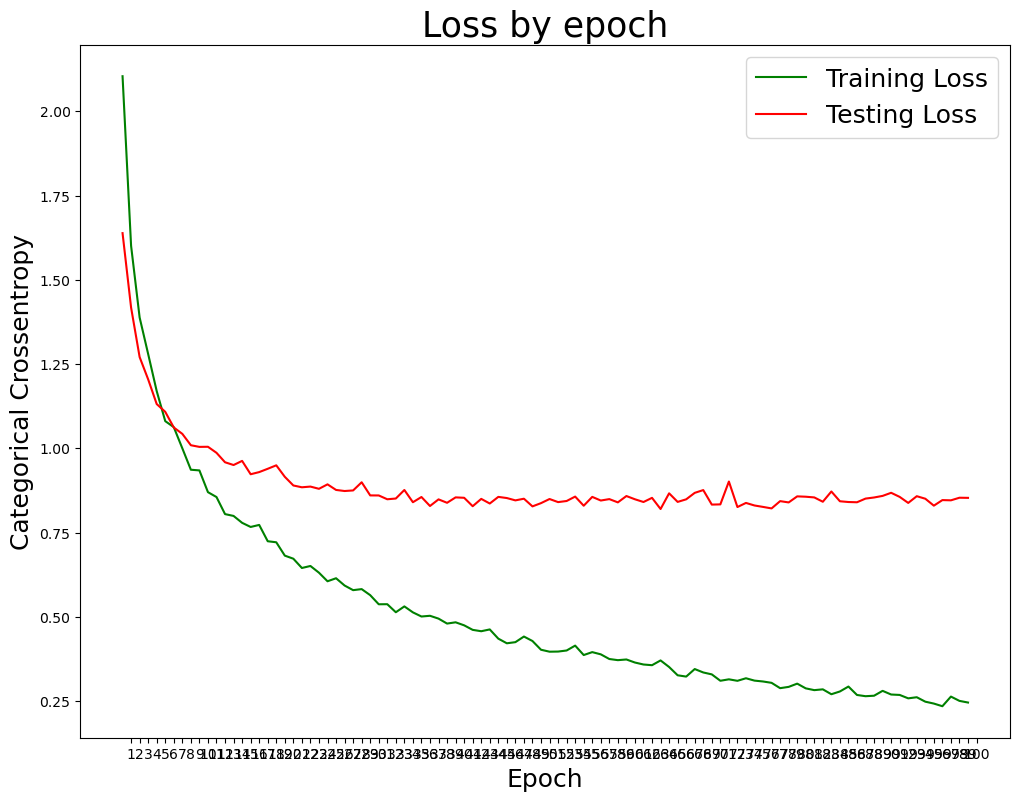

In [104]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 9))

plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(test_loss, label='Testing Loss', color='red')

plt.title('Loss by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(range(1, 101), range(1, 101))

plt.legend(fontsize=18)

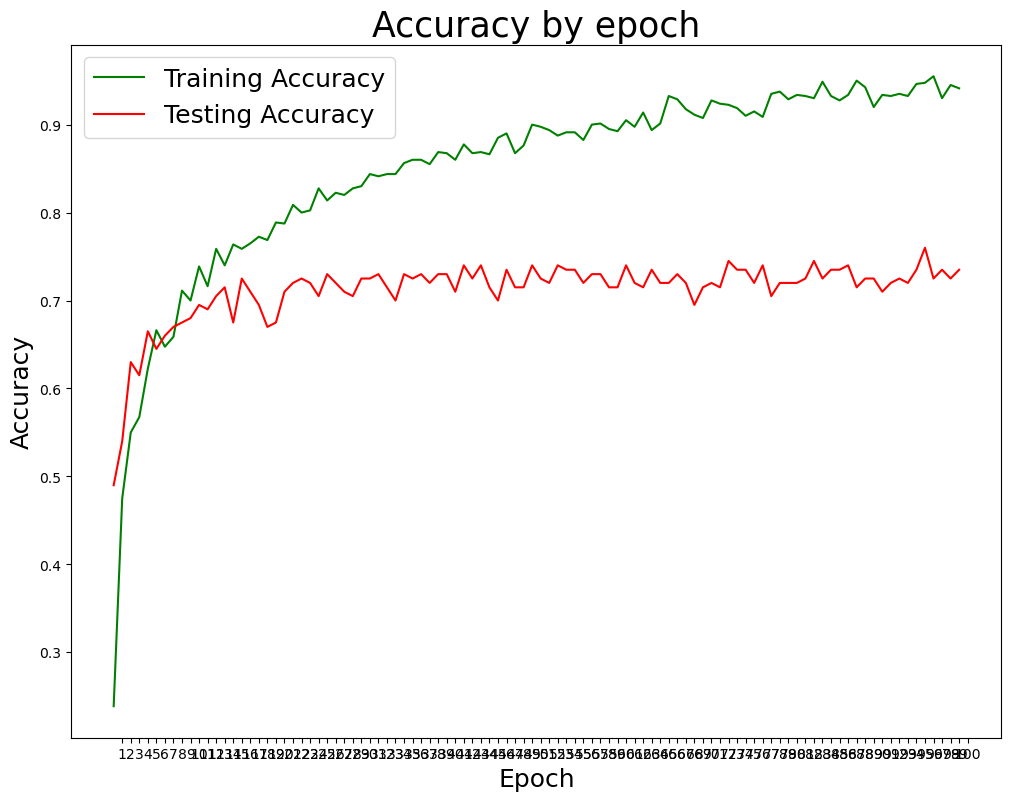

In [105]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 9))

plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Testing Accuracy', color='red')

plt.title('Accuracy by epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(range(1, 101), range(1, 101))

plt.legend(fontsize=18)

In [100]:
y_pred = model.predict(X_test_tensor)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(y_test_tensor, axis=1)

7/7 [==============================] - 9s 1s/step


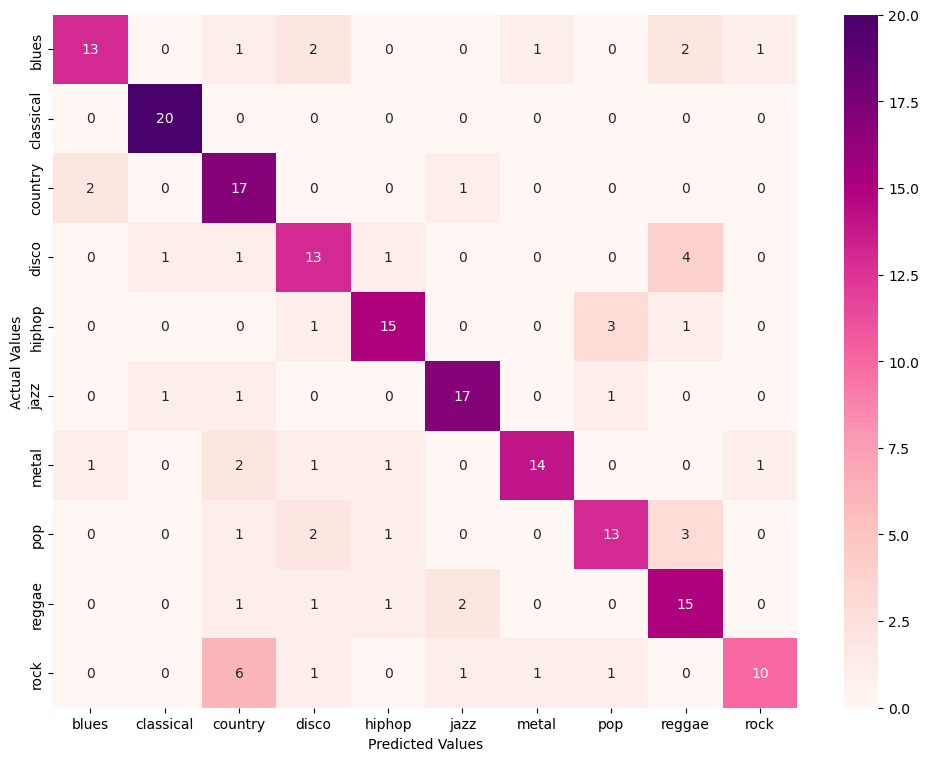

In [101]:
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./Images/Transfer_mobilenet_confusion_matrix.png', bbox_inches='tight')

In [102]:
print(classification_report(y_actual, y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.81      0.65      0.72        20
   classical       0.91      1.00      0.95        20
     country       0.57      0.85      0.68        20
       disco       0.62      0.65      0.63        20
      hiphop       0.79      0.75      0.77        20
        jazz       0.81      0.85      0.83        20
       metal       0.88      0.70      0.78        20
         pop       0.72      0.65      0.68        20
      reggae       0.60      0.75      0.67        20
        rock       0.83      0.50      0.62        20

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.73      0.73       200



In [103]:
model.save_weights('./Models/GTZAN_transfer_mobilenet.cpkt')

pickle.dump(history.history, open('./Models/GTZAN_CNN__transfer_mobilenet_history.pkl', 'wb'))

### Vision Transformers (ViT)

(+details on what it is)

(not working at the moment, the vit_keras is huge, maybe is not good for this)

In [146]:
new_shape = (int(np.sqrt(288*432*3)), int(np.sqrt(288*432*3)))
X_train = np.array([np.reshape(elem, new_shape) for elem in X_train])

ValueError: cannot reshape array of size 373248 into shape (610,610)

In [143]:
X_test.reshape((200, 186624, 186624))

ValueError: cannot reshape array of size 200 into shape (200,186624,186624)

In [161]:
X_train_tensor.shape

TensorShape([800, 288, 432, 3])

In [169]:
from keras.layers import MultiHeadAttention, LayerNormalization, Input, \
    Reshape, GlobalAveragePooling1D
from keras import Model

input_shape = (288, 432, 3)

# Input patch embedding
inputs = Input(shape=input_shape)
x = Conv2D(768, kernel_size=16, strides=16, padding="valid")(inputs)
x = Reshape((-1, 768))(x)
x = LayerNormalization(epsilon=1e-6)(x)
outputs = Dense(len(genres), activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()

# Transformer Encoder
num_layers = 12
embed_dim = 768
num_heads = 12
ff_dim = 3072
for i in range(num_layers):
    # Multi-head attention
    attention_out = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads)(x, x)
    attention_out = Dropout(0.1)(attention_out)
    attention_out = LayerNormalization(epsilon=1e-6)(x + attention_out)

    # Feed-forward network
    ffn_out = Dense(ff_dim, activation="relu")(attention_out)
    ffn_out = Dense(embed_dim)(ffn_out)
    ffn_out = Dropout(0.1)(ffn_out)
    ffn_out = LayerNormalization(epsilon=1e-6)(attention_out + ffn_out)

    x = ffn_out

# Classification head
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
outputs = Dense(len(genres), activation="softmax")(x)

# Instantiate the model
model = Model(inputs, outputs)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 288, 432, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 18, 27, 768)       590592    
                                                                 
 reshape_17 (Reshape)        (None, 486, 768)          0         
                                                                 
 layer_normalization_11 (Lay  (None, 486, 768)         1536      
 erNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 486, 10)           7690      
                                                                 
Total params: 599,818
Trainable params: 599,818
Non-trainable params: 0
_____________________________________________________

In [164]:
from vit_keras import vit
from keras.layers import Input
from keras import Model

input_shape = (288, 432, 3)

model = vit.vit_b16(
    image_size=(input_shape[0], input_shape[1]),
    activation='softmax',
    pretrained=False,
    include_top=True,
    pretrained_top=False,
    classes=len(genres)
)
layer = model.layers[-2].output
layer = Flatten()(layer)
layer = Dense(1024, activation='relu')(layer)
layer = Dense(len(genres), activation='softmax')(layer)
model = Model(inputs=model.input, outputs=layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(X_train_tensor,
                    y_train_tensor,
                    batch_size=16,
                    validation_data=(X_test_tensor, y_test_tensor),
                    epochs=10)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 288, 432, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 18, 27, 768)       590592    
                                                                 
 reshape_12 (Reshape)        (None, 486, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 487, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 487, 768)         374016    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 487, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

KeyboardInterrupt: 